In [1]:
import pandas as pd
import numpy as np

In [2]:
from numpy import linalg as LA
from scipy.spatial import distance

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [4]:
%matplotlib notebook
from matplotlib import pyplot as plt

In [5]:
from sklearn.decomposition import PCA

In [6]:
from numpy import linalg as LA

In [7]:
pca = PCA(n_components=2)

In [8]:
data_set = pd.read_csv("cho.txt", sep = '\t', lineterminator = '\n',header = -1)

In [9]:
data_set_1 = data_set[data_set[1]!=-1]

### Remove outliers

In [10]:
from scipy import stats
data_set_1 = data_set_1[(np.abs(stats.zscore(data_set_1)) < 3).all(axis=1)]

In [11]:
ground_truth = data_set_1[1]

In [12]:
len(ground_truth)

364

In [13]:
max_num_iterations = 50

In [14]:
num_clusters = len(ground_truth.unique())

In [15]:
num_clusters

5

In [16]:
data_set_1 = data_set_1.loc[:,2:]

### Pre-processing data

In [17]:
scaler = MinMaxScaler()
print(scaler.fit(data_set_1))

data_set_1.head(3)

data_set_1 = pd.DataFrame(scaler.transform(data_set_1))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [18]:
projected = pca.fit_transform(data_set_1)

In [19]:
pca.fit(data_set_1)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Visualization of data points by PCA before clustering by K-means

<IPython.core.display.Javascript object>


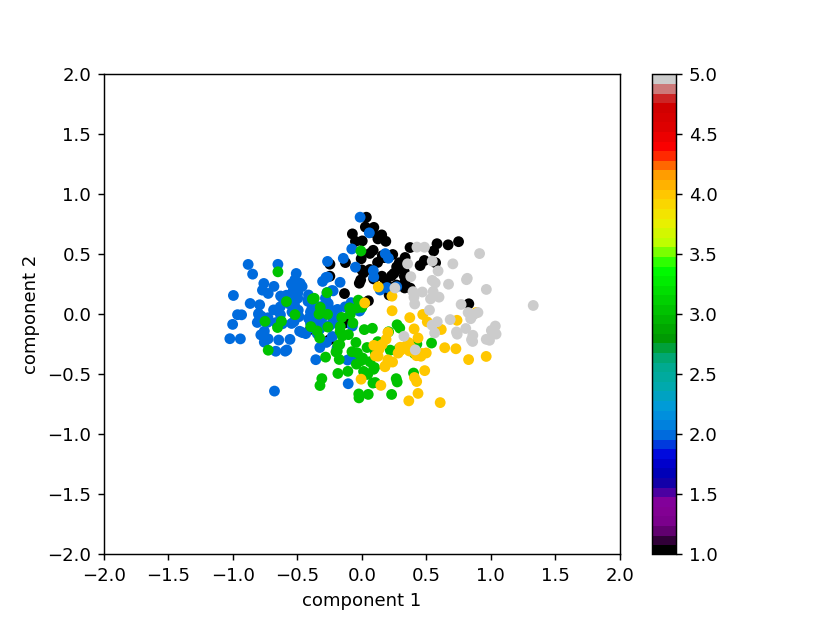

In [20]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=ground_truth, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('nipy_spectral', 50))
plt.figure(1, figsize=(20, 5))
plt.axis([-2,2,-2,2])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [22]:
projected = pca.fit_transform(data_set_1)

In [23]:
from scipy.spatial import distance

In [24]:
import numpy as np

In [25]:
data_set_1.shape[0]

364

In [26]:
data_set_1 = data_set_1.dropna()

In [27]:
data_set_1.shape[0]

364

### Sample, perform HAC and get intial centroids

In [28]:
sample_dataset = data_set_1.sample(frac=0.1, replace=False)

In [29]:
len(sample_dataset)

36

In [30]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')  

In [32]:
arr = cluster.fit_predict(sample_dataset)

In [33]:
arr

array([4, 1, 2, 3, 1, 1, 1, 3, 0, 0, 0, 2, 2, 4, 3, 1, 0, 2, 0, 1, 3, 3, 3,
       4, 2, 3, 1, 2, 3, 1, 1, 0, 2, 2, 1, 3])

In [34]:
type(arr)

numpy.ndarray

In [35]:
sample_dataset['cluster_id'] = arr

In [36]:
global initial_centroids 
initial_centroids = sample_dataset.groupby("cluster_id").mean()

In [37]:
sample_dataset.head(5)

0         1         2         3         4         5         6  \
353  0.304734  0.431373  0.238636  0.346705  0.561728  0.541502  0.716981   
84   0.402367  0.647059  0.881818  0.676218  0.407407  0.189723  0.389937   
309  0.307692  0.794118  0.538636  0.424069  0.373457  0.624506  0.748428   
275  0.349112  0.428105  0.554545  0.710602  0.771605  0.873518  0.698113   
260  0.532544  0.866013  0.913636  0.833811  0.490741  0.387352  0.411950   

            7         8         9        10        11        12        13  \
353  0.752604  0.687500  0.314363  0.263333  0.382979  0.730337  0.779343   
84   0.239583  0.360119  0.677507  0.710000  0.760638  0.484831  0.352113   
309  0.526042  0.616071  0.344173  0.313333  0.313830  0.668539  0.547887   
275  0.500000  0.440476  0.325203  0.413333  0.515957  0.627528  0.596244   
260  0.239583  0.354167  0.617886  0.603333  0.430851  0.449438  0.126761   

           14        15  cluster_id  
353  0.874576  0.749175           4  
84   0.328814  0.392739           1  
309  0.688136  0.590759           2  
275  0.471186  0.330033           3  
260  0.328814  0.141914           1

### Assign the centroids

In [38]:
display(initial_centroids)

0         1         2         3         4         5   \
cluster_id                                                               
0           0.835799  0.649237  0.294697  0.265043  0.329733  0.240448   
1           0.484320  0.686275  0.800000  0.706590  0.506481  0.378656   
2           0.508136  0.597222  0.380966  0.364613  0.385031  0.406621   
3           0.385273  0.558824  0.659596  0.744667  0.698560  0.651735   
4           0.202170  0.440087  0.296212  0.314231  0.487654  0.652174   

                  6         7         8         9         10        11  \
cluster_id                                                               
0           0.348532  0.352865  0.582341  0.637760  0.621667  0.628546   
1           0.405975  0.275000  0.275298  0.682385  0.670833  0.588723   
2           0.722877  0.655599  0.745164  0.412940  0.305000  0.309840   
3           0.613208  0.456597  0.393188  0.378199  0.455556  0.556915   
4           0.837526  0.722222  0.781746  0.357724  0.283333  0.299645   

                  12        13        14        15  
cluster_id                                          
0           0.544007  0.527387  0.614068  0.701870  
1           0.544157  0.333803  0.318983  0.341584  
2           0.465379  0.572594  0.674746  0.639439  
3           0.654120  0.508607  0.448851  0.348368  
4           0.741573  0.735994  0.798870  0.685369

In [39]:
def get_cluster(data_point,initial_centroids):
    train_1 = initial_centroids.iloc(axis = 0)[:,-1]
    data_point = data_point.drop('cluster_id',axis=1)
    min_dst = -1
    cluster_id = 0
    for i,val in initial_centroids.iterrows():
        train_data_point = pd.DataFrame(val).transpose()
        train_data_point_1 = train_data_point.copy()
        dst = distance.euclidean(data_point, train_data_point_1)
        if((min_dst > dst) or min_dst < 0):
            min_dst = dst
            cluster_id = i
    return cluster_id + 1

In [40]:
def K_means(data_set_1):
    initial_centroids = sample_dataset.groupby("cluster_id").mean()
    iteration = 0
    while(True):
        iteration = iteration + 1
        for i,data_point in data_set_1.iterrows():
            data_point = pd.DataFrame(data_point).transpose()
            predicted_cluster = get_cluster(data_point,initial_centroids)
            try:
                data_set_1.iloc[i]['cluster_id'] = predicted_cluster
            except:
                i = i+1
                continue
        data_set_2 = data_set_1
        present_centroids = data_set_2.groupby("cluster_id").mean()
        try:
#             print(initial_centroids)
#             print(present_centroids)
#             print("----------------")
#             print("----------------")
            if(initial_centroids.equals(present_centroids) or iteration > max_num_iterations):
                break
            initial_centroids = present_centroids
        except:
            continue

In [41]:
default_cluster = np.zeros(shape=(data_set_1.shape[0]), dtype=float, order='F')

In [42]:
data_set_1['cluster_id'] = default_cluster

In [43]:
data_set_1.shape[1]

17

In [44]:
data_set_1.head()

0         1         2         3         4         5         6  \
0  0.390533  0.330065  0.272727  0.349570  0.342593  0.517787  0.235849   
1  0.505917  0.460784  0.470455  0.395415  0.429012  0.355731  0.396226   
2  0.615385  0.728758  0.429545  0.343840  0.317901  0.316206  0.594340   
3  0.286982  0.686275  0.652273  0.412607  0.240741  0.343874  0.638365   
4  0.248521  0.673203  0.418182  0.240688  0.154321  0.142292  0.625786   

          7         8         9        10        11        12        13  \
0  0.166667  0.782738  0.794038  0.653333  0.797872  0.595506  0.502347   
1  0.213542  0.633929  0.658537  0.566667  0.526596  0.625843  0.464789   
2  0.690104  0.711310  0.498645  0.370000  0.281915  0.475843  0.427230   
3  0.731771  0.857143  0.517615  0.420000  0.367021  0.095506  0.460094   
4  0.726563  0.803571  0.555556  0.336667  0.191489  0.412921  0.615023   

         14        15  cluster_id  
0  0.633898  0.772277         0.0  
1  0.515254  0.722772         0.0  
2  0.549153  0.620462         0.0  
3  0.600678  0.501650         0.0  
4  0.877966  0.726073         0.0

In [45]:
K_means(data_set_1)

In [46]:
calc_truth = data_set_1["cluster_id"]

In [47]:
%matplotlib notebook
from matplotlib import pyplot

In [48]:
calc_truth.unique()

array([ 51.,  53.,  52.,  55.,  54.])

<IPython.core.display.Javascript object>


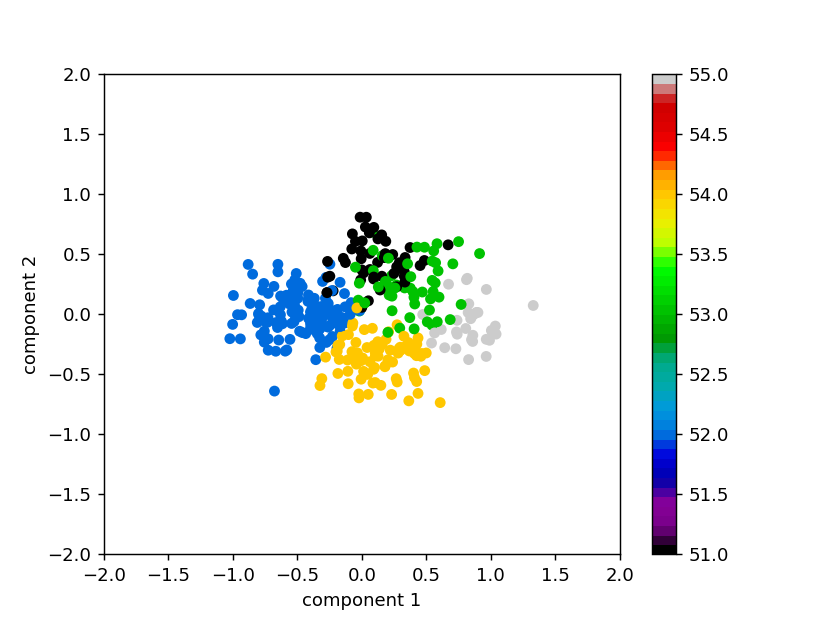

In [49]:
pyplot.scatter(projected[:, 0], projected[:, 1],
            c=calc_truth, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('nipy_spectral', 50))
pyplot.figure(1, figsize=(20, 10))
pyplot.axis([-2,2,-2,2])
pyplot.xlabel('component 1')
pyplot.ylabel('component 2')
pyplot.colorbar();

In [49]:
len(calc_truth)

364

In [50]:
def incidence_matrix(ground_truth,default_clusters,ground_truth_map):
    incidence_matrix = np.zeros((len(default_clusters),len(default_clusters)))
    incidence_matrix_p = np.zeros((len(default_clusters),len(default_clusters)))
    incidence_matrix_c = np.zeros((len(default_clusters),len(default_clusters)))
    for i in range(len(default_clusters)):
        for j in range(len(default_clusters)):
            if default_clusters[i] == default_clusters[j]:
                incidence_matrix_c[i][j] = 1
            else:
                incidence_matrix_c[i][j] = 0
            if ground_truth[ground_truth_map[i]] == ground_truth[ground_truth_map[j]]:
                incidence_matrix_p[i][j] = 1
            else:
                incidence_matrix_p[i][j] = 0
    return incidence_matrix_c,incidence_matrix_p

In [51]:
def jaccard_coefficient(ground_truth,default_clusters,ground_truth_map):
    index = 0
    M11 = 0
    M00 = 0
    M10 = 0
    M01 = 0
    incidence_matrix_c,incidence_matrix_p = incidence_matrix(ground_truth,default_clusters,ground_truth_map)
    for i in range(len(default_clusters)):
        for j in range(len(default_clusters)):
            if incidence_matrix_p[i][j] == 1 and incidence_matrix_c[i][j] == 1:
                M11 = M11 + 1
            elif incidence_matrix_p[i][j] == 0 and incidence_matrix_c[i][j] == 0:
                M00 = M00 + 1
            elif incidence_matrix_p[i][j] == 1 and incidence_matrix_c[i][j] == 0:
                M10 = M10 + 1
            elif incidence_matrix_p[i][j] == 0 and incidence_matrix_c[i][j] == 1:
                M01 = M01 + 1
            index = index + 1
#    print (M11,M10,M01)
    jaccard_coeff = M11 / (M11 + M10 + M01)
    return jaccard_coeff

In [52]:
def calc_jaccard(default_clusters):
    default_clusters_set = sorted(set(default_clusters))
   # print (len(default_clusters_set))
    clusters_map = {}
    for i in range(len(default_clusters_set)):
        clusters_map[default_clusters_set[i]] = i+1
    count = 1
    cluster_id = 1
    for i in range(len(default_clusters)):
        default_clusters[i] = clusters_map[default_clusters[i]]
    ground_truth_map = {}
    index = 0
    for i in ground_truth.index.values:
        ground_truth_map[index] = i
        index = index + 1
    return jaccard_coefficient(ground_truth,default_clusters,ground_truth_map)

In [53]:
jaccard_coefficient = calc_jaccard(calc_truth)
print ("jaccard_coefficient")
print (jaccard_coefficient)

jaccard_coefficient
0.4164213855818653
